In [80]:
import pandas as pd

In [82]:
df_canciones = pd.read_csv('datos_canciones.csv')


In [8]:
df_canciones

,Canción ID,Nombre,Artistas,Duración (segundos),Popularidad,Explícito,Fecha de Lanzamiento,Url de Spotify,Imagen,Danceability,Energy,Valence,Tempo,Acousticness,Instrumentalness,Speechiness,Clave (Key),Modo (Mode)
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",251.667,100,False,2024-08-16,https://open.spotify.com/track/2plbrEY59IikOBg...,https://i.scdn.co/image/ab67616d0000b27382ea2e...,0.521,0.592,0.535,157.969,0.30800,0.000000,0.0304,6,0
1,5vNRhkKd0yEAg8suGBpjeY,APT.,"ROSÉ, Bruno Mars",169.917,97,False,2024-10-18,https://open.spotify.com/track/5vNRhkKd0yEAg8s...,https://i.scdn.co/image/ab67616d0000b273f8c829...,0.777,0.783,0.939,149.027,0.02830,0.000000,0.2600,0,0
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,210.373,97,False,2024-05-17,https://open.spotify.com/track/6dOtVTDdiauQNBQ...,https://i.scdn.co/image/ab67616d0000b27371d62e...,0.747,0.507,0.438,104.978,0.20000,0.060800,0.0358,2,1
3,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,170.887,92,False,2024-07-19,https://open.spotify.com/track/7tI8dRuH2Yc6Ruo...,https://i.scdn.co/image/ab67616d0000b273f02c45...,0.660,0.756,0.838,116.034,0.00289,0.000000,0.0320,0,0
4,1cOboCuWYI2osTOfolMRS6,Tu Boda,"Oscar Maydon, Fuerza Regida",225.880,92,True,2024-09-26,https://open.spotify.com/track/1cOboCuWYI2osTO...,https://i.scdn.co/image/ab67616d0000b273b51d9a...,0.694,0.651,0.471,112.648,0.49600,0.000014,0.0784,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55821,6Yard5LK4aXEn0kBKtHSob,Se Fue La Pantera (En Vivo),"Grupo Firme, Grupo Recluta",202.021,15,False,2021-08-12,https://open.spotify.com/track/6Yard5LK4aXEn0k...,https://i.scdn.co/image/ab67616d0000b273ea5b24...,0.557,0.660,0.907,128.179,0.11800,0.000000,0.0768,3,1
55822,2fQrrBtuNVMWOHqLyk4EfO,Yo Todo Lo Doy,Alfredo Olivas,202.453,73,False,2022-09-30,https://open.spotify.com/track/2fQrrBtuNVMWOHq...,https://i.scdn.co/image/ab67616d0000b2734ad368...,0.597,0.725,0.800,189.960,0.30600,0.000161,0.1360,2,0
55823,0QT0CmOXJCkDpJp6QsBM6H,Dile,Joaquin Guiller,175.291,38,False,2024-10-03,https://open.spotify.com/track/0QT0CmOXJCkDpJp...,https://i.scdn.co/image/ab67616d0000b273da1e41...,0.786,0.555,0.721,145.086,0.56400,0.000000,0.0436,2,0
55824,1WG3EivQuvS70RPnW8D6Fi,"Músico, Poeta Y Loco",Elio Vega,250.642,51,False,2024-10-11,https://open.spotify.com/track/1WG3EivQuvS70RP...,https://i.scdn.co/image/ab67616d0000b273c931ab...,0.681,0.409,0.915,107.770,0.55300,0.000032,0.0325,10,1


Obteniendo canciones para el género pop...
Obteniendo canciones para el género rock...
Obteniendo canciones para el género hip hop...
Obteniendo canciones para el género electronic...
Obteniendo canciones para el género classical...
Obteniendo canciones para el género jazz...
Obteniendo canciones para el género country...
Obteniendo canciones para el género latin...
               nombre predicted_genre
0    Die With A Smile         country
1                APT.            rock
2  BIRDS OF A FEATHER         hip hop
3                 Who           latin
4             Tu Boda         country


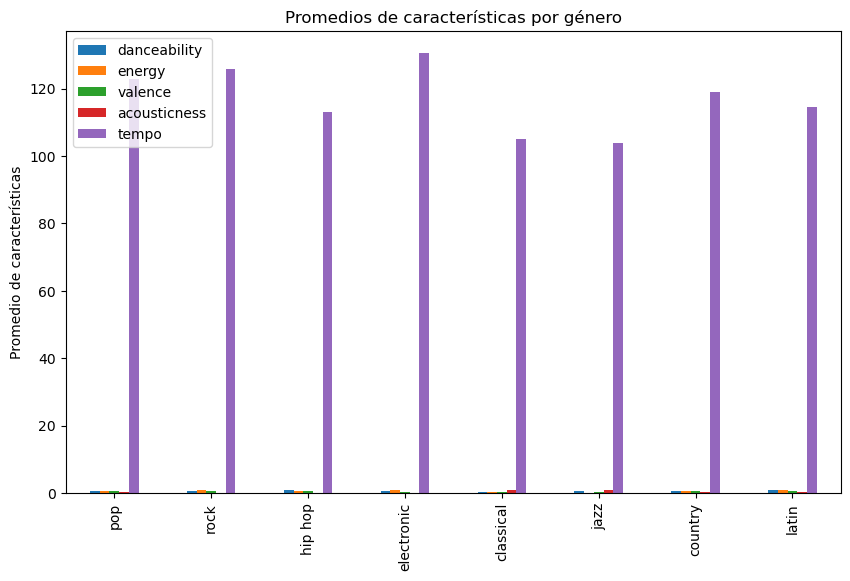

In [114]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Credenciales de la API de Spotify
client_id = '5797939a603f4dfc8ca8a21c44fceaa7'  # Reemplaza con tu CLIENT_ID
client_secret = 'acc2eb4696e24a3685f60771a77bfe7c'  # Reemplaza con tu CLIENT_SECRET

# Autenticación con las credenciales
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Géneros a obtener
generos = ['pop', 'rock', 'hip hop', 'electronic', 'classical', 'jazz', 'country', 'latin']

# Función para obtener canciones de un género
def obtener_canciones_de_genero(genre, num_playlists=10, num_tracks=50):
    playlists = sp.search(q=genre, type='playlist', limit=num_playlists)  # Aumentamos el número de playlists
    tracks = []
    
    for playlist in playlists['playlists']['items']:
        playlist_uri = playlist['uri']
        playlist_tracks = sp.playlist_tracks(playlist_uri)
        for item in playlist_tracks['items']:
            if item['track']:
                tracks.append(item['track']['id'])
            if len(tracks) >= num_tracks:  # Limitar el número de canciones por género
                break
        if len(tracks) >= num_tracks:
            break
    
    return tracks

# Función para obtener características de canciones
def obtener_caracteristicas_canciones(track_ids):
    features = sp.audio_features(track_ids)
    return features

# Calcular promedios de las características por género
def calcular_promedios_de_generos(generos):
    genero_promedios = {}
    
    for genero in generos:
        print(f"Obteniendo canciones para el género {genero}...")
        track_ids = obtener_canciones_de_genero(genero)
        features = obtener_caracteristicas_canciones(track_ids)
        
        # Crear listas para almacenar las características
        danceability = []
        energy = []
        valence = []
        acousticness = []
        tempo = []
        
        for feature in features:
            if feature:
                danceability.append(feature['danceability'])
                energy.append(feature['energy'])
                valence.append(feature['valence'])
                acousticness.append(feature['acousticness'])
                tempo.append(feature['tempo'])
        
        # Calcular el promedio de cada característica
        genero_promedios[genero] = {
            'danceability': np.mean(danceability),
            'energy': np.mean(energy),
            'valence': np.mean(valence),
            'acousticness': np.mean(acousticness),
            'tempo': np.mean(tempo)
        }
    
    return genero_promedios

# Obtener promedios de géneros
genero_promedios = calcular_promedios_de_generos(generos)

# Convertir los promedios de géneros en un DataFrame
genero_promedios_df = pd.DataFrame(genero_promedios).T

# Submuestreo para balancear el conjunto de entrenamiento
min_canciones = genero_promedios_df['danceability'].value_counts().min()

df_balanceado = pd.DataFrame()
for genero in genero_promedios_df.index:
    df_temp = genero_promedios_df[genero_promedios_df.index == genero]
    df_balanceado = pd.concat([df_balanceado, resample(df_temp, replace=False, n_samples=min_canciones, random_state=42)])

# Escalar los datos de los géneros
scaler = StandardScaler()
X_generos_scaled = scaler.fit_transform(df_balanceado[['danceability', 'energy', 'valence', 'acousticness', 'tempo']])
y_generos = df_balanceado.index

# Entrenar el modelo Random Forest (también se puede probar KNN)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_generos_scaled, y_generos)

# Ahora predecimos los géneros para df_canciones
# Asegurarnos de que las columnas en df_canciones estén en minúsculas
df_canciones.columns = df_canciones.columns.str.lower()

# Asegurarse de que las columnas necesarias están en df_canciones
caracteristicas = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']
if all(col in df_canciones.columns for col in caracteristicas):
    # Escalar las características de df_canciones
    X_canciones_scaled = scaler.transform(df_canciones[caracteristicas])

    # Predecir los géneros con el modelo entrenado
    df_canciones['predicted_genre'] = rf.predict(X_canciones_scaled)

    # Mostrar las primeras filas con el género predicho
    print(df_canciones[['nombre', 'predicted_genre']].head())
else:
    print("Faltan algunas columnas necesarias en df_canciones.")

# Visualización de las distribuciones de características por género
# Esto te ayudará a entender mejor cómo se distribuyen las características por cada género
genero_promedios_df.plot(kind='bar', figsize=(10, 6), title='Promedios de características por género')
plt.ylabel('Promedio de características')
plt.show()


In [116]:
df_canciones["predicted_genre"].value_counts()

predicted_genre
rock          10497
electronic     8278
latin          8130
country        7153
pop            6601
hip hop        6411
classical      4912
jazz           3844
Name: count, dtype: int64

In [118]:
print(genero_promedios_df)


            danceability    energy   valence  acousticness      tempo
pop             0.682500  0.682420  0.617640      0.174008  122.89192
rock            0.498580  0.786620  0.464560      0.062138  125.70544
hip hop         0.785120  0.689760  0.520742      0.108061  113.07656
electronic      0.683800  0.836260  0.435790      0.064042  130.55284
classical       0.317558  0.207428  0.231078      0.857630  105.12668
jazz            0.464680  0.139296  0.172326      0.922280  103.75496
country         0.575860  0.628780  0.508720      0.318741  119.06526
latin           0.753740  0.772440  0.670760      0.185555  114.64068


In [120]:
df_canciones

,canción id,nombre,artistas,duración (segundos),popularidad,explícito,fecha de lanzamiento,url de spotify,imagen,danceability,energy,valence,tempo,acousticness,instrumentalness,speechiness,clave (key),modo (mode),predicted_genre
0,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",251.667,100,False,2024-08-16,https://open.spotify.com/track/2plbrEY59IikOBg...,https://i.scdn.co/image/ab67616d0000b27382ea2e...,0.521,0.592,0.535,157.969,0.30800,0.000000,0.0304,6,0,country
1,5vNRhkKd0yEAg8suGBpjeY,APT.,"ROSÉ, Bruno Mars",169.917,97,False,2024-10-18,https://open.spotify.com/track/5vNRhkKd0yEAg8s...,https://i.scdn.co/image/ab67616d0000b273f8c829...,0.777,0.783,0.939,149.027,0.02830,0.000000,0.2600,0,0,rock
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,210.373,97,False,2024-05-17,https://open.spotify.com/track/6dOtVTDdiauQNBQ...,https://i.scdn.co/image/ab67616d0000b27371d62e...,0.747,0.507,0.438,104.978,0.20000,0.060800,0.0358,2,1,hip hop
3,7tI8dRuH2Yc6RuoTjxo4dU,Who,Jimin,170.887,92,False,2024-07-19,https://open.spotify.com/track/7tI8dRuH2Yc6Ruo...,https://i.scdn.co/image/ab67616d0000b273f02c45...,0.660,0.756,0.838,116.034,0.00289,0.000000,0.0320,0,0,latin
4,1cOboCuWYI2osTOfolMRS6,Tu Boda,"Oscar Maydon, Fuerza Regida",225.880,92,True,2024-09-26,https://open.spotify.com/track/1cOboCuWYI2osTO...,https://i.scdn.co/image/ab67616d0000b273b51d9a...,0.694,0.651,0.471,112.648,0.49600,0.000014,0.0784,6,1,country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55821,6Yard5LK4aXEn0kBKtHSob,Se Fue La Pantera (En Vivo),"Grupo Firme, Grupo Recluta",202.021,15,False,2021-08-12,https://open.spotify.com/track/6Yard5LK4aXEn0k...,https://i.scdn.co/image/ab67616d0000b273ea5b24...,0.557,0.660,0.907,128.179,0.11800,0.000000,0.0768,3,1,pop
55822,2fQrrBtuNVMWOHqLyk4EfO,Yo Todo Lo Doy,Alfredo Olivas,202.453,73,False,2022-09-30,https://open.spotify.com/track/2fQrrBtuNVMWOHq...,https://i.scdn.co/image/ab67616d0000b2734ad368...,0.597,0.725,0.800,189.960,0.30600,0.000161,0.1360,2,0,pop
55823,0QT0CmOXJCkDpJp6QsBM6H,Dile,Joaquin Guiller,175.291,38,False,2024-10-03,https://open.spotify.com/track/0QT0CmOXJCkDpJp...,https://i.scdn.co/image/ab67616d0000b273da1e41...,0.786,0.555,0.721,145.086,0.56400,0.000000,0.0436,2,0,latin
55824,1WG3EivQuvS70RPnW8D6Fi,"Músico, Poeta Y Loco",Elio Vega,250.642,51,False,2024-10-11,https://open.spotify.com/track/1WG3EivQuvS70RP...,https://i.scdn.co/image/ab67616d0000b273c931ab...,0.681,0.409,0.915,107.770,0.55300,0.000032,0.0325,10,1,classical


In [123]:
df_canciones.to_csv("canciones_total.csv", index=False)
